In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [63]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

In [64]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [65]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Survival Rate of passengers

Text(0.5, 1.0, 'Survived')

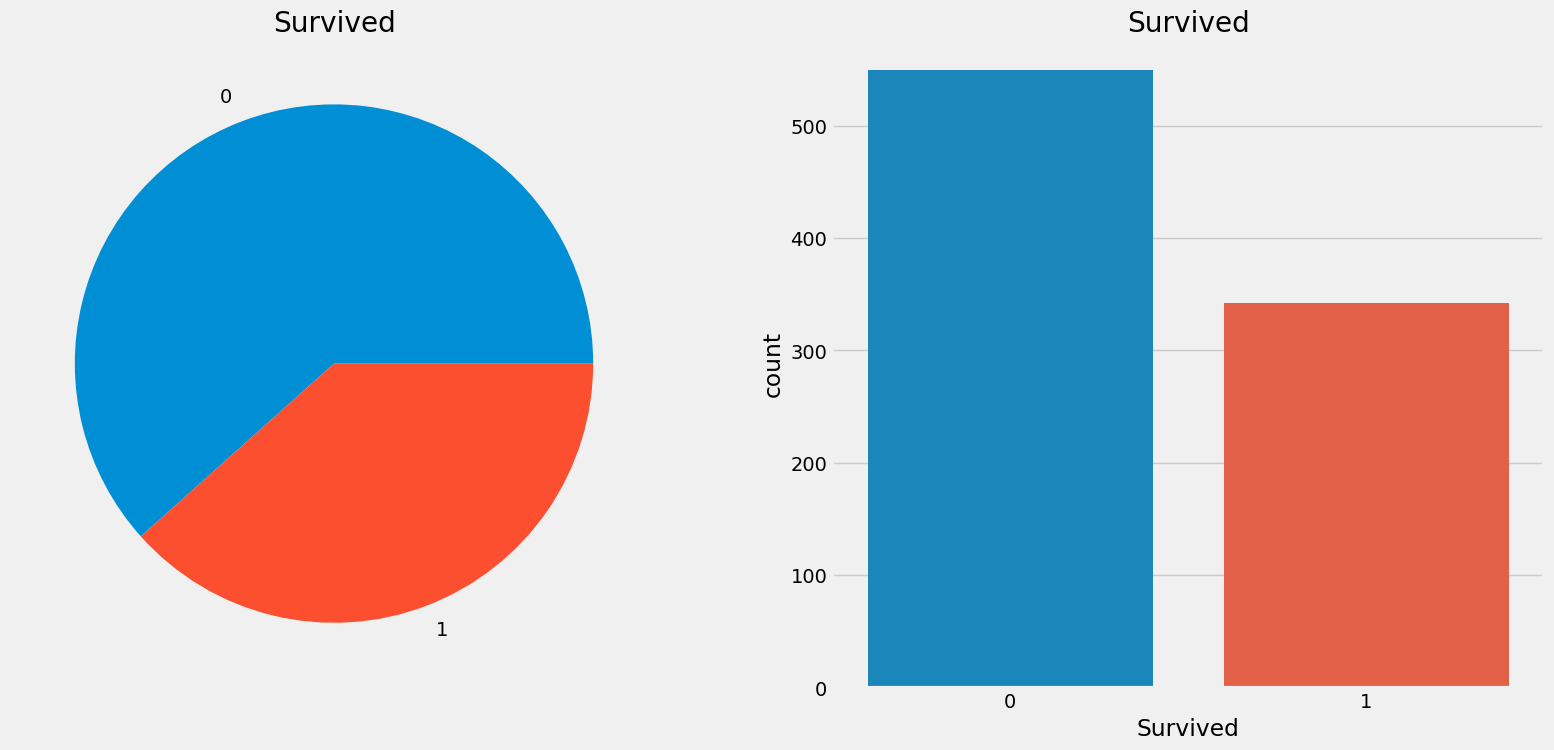

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
df["Survived"].value_counts().plot.pie(ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df, ax=ax[1])
ax[1].set_title('Survived')

It can be observed that out of 891 passengers (given in the train set), only around 350 survived, i.e., only about 38.4% of them survived

## Survival rate wrt Sex

In [67]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived vs Dead per sex')

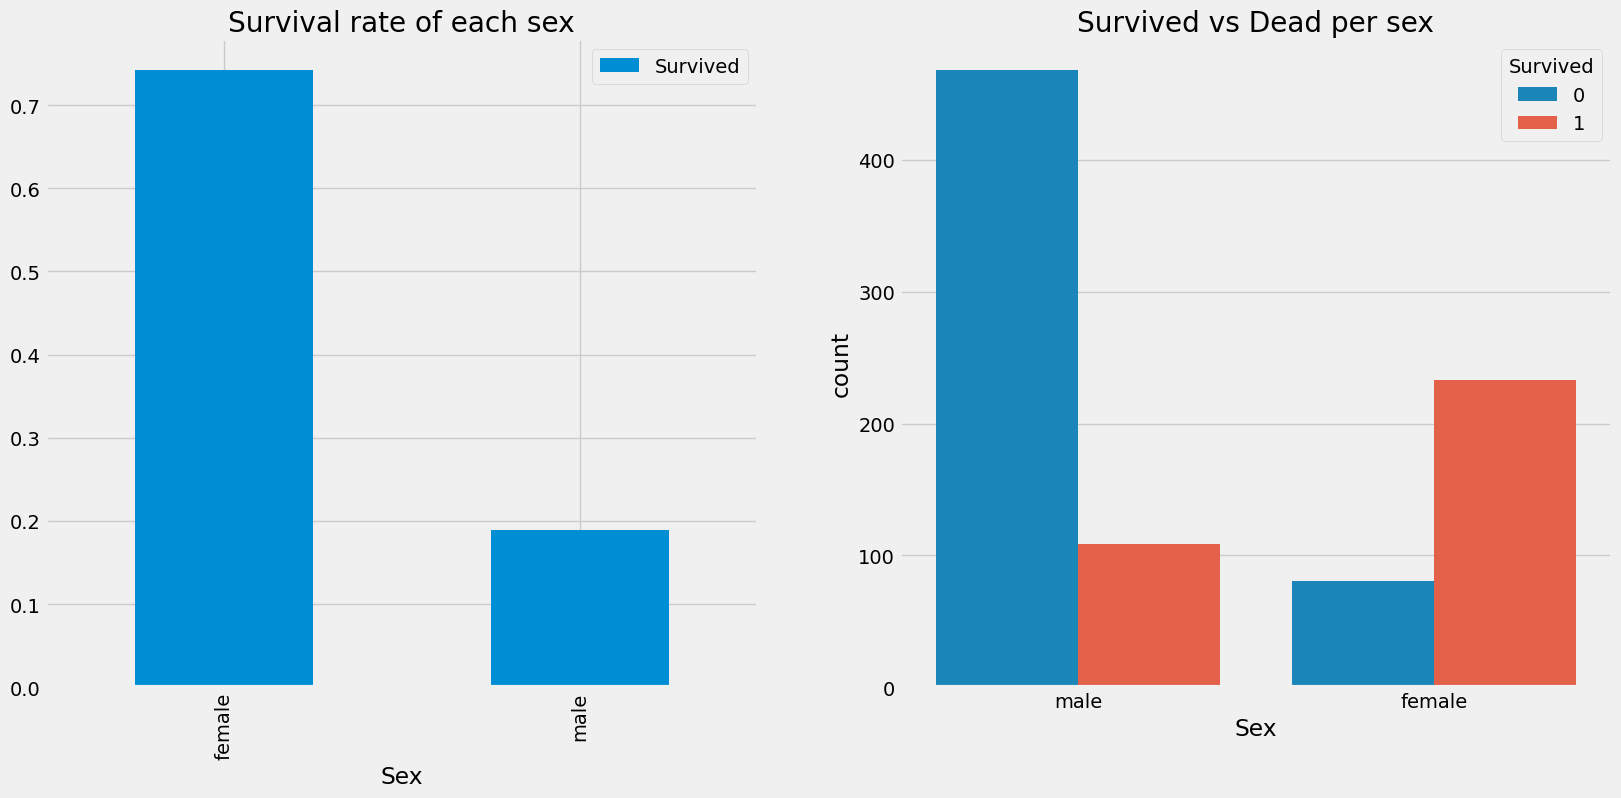

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
df[['Sex', 'Survived']].groupby(["Sex"]).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survival rate of each sex")
sns.countplot(x='Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Survived vs Dead per sex')

Due to the 'women and children first' rule, more women survived than men

## Survival rate wrt Passenger Class

In [69]:
pd.crosstab(df.Pclass, df.Survived, margins='True')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Survived vs Dead per Pclass')

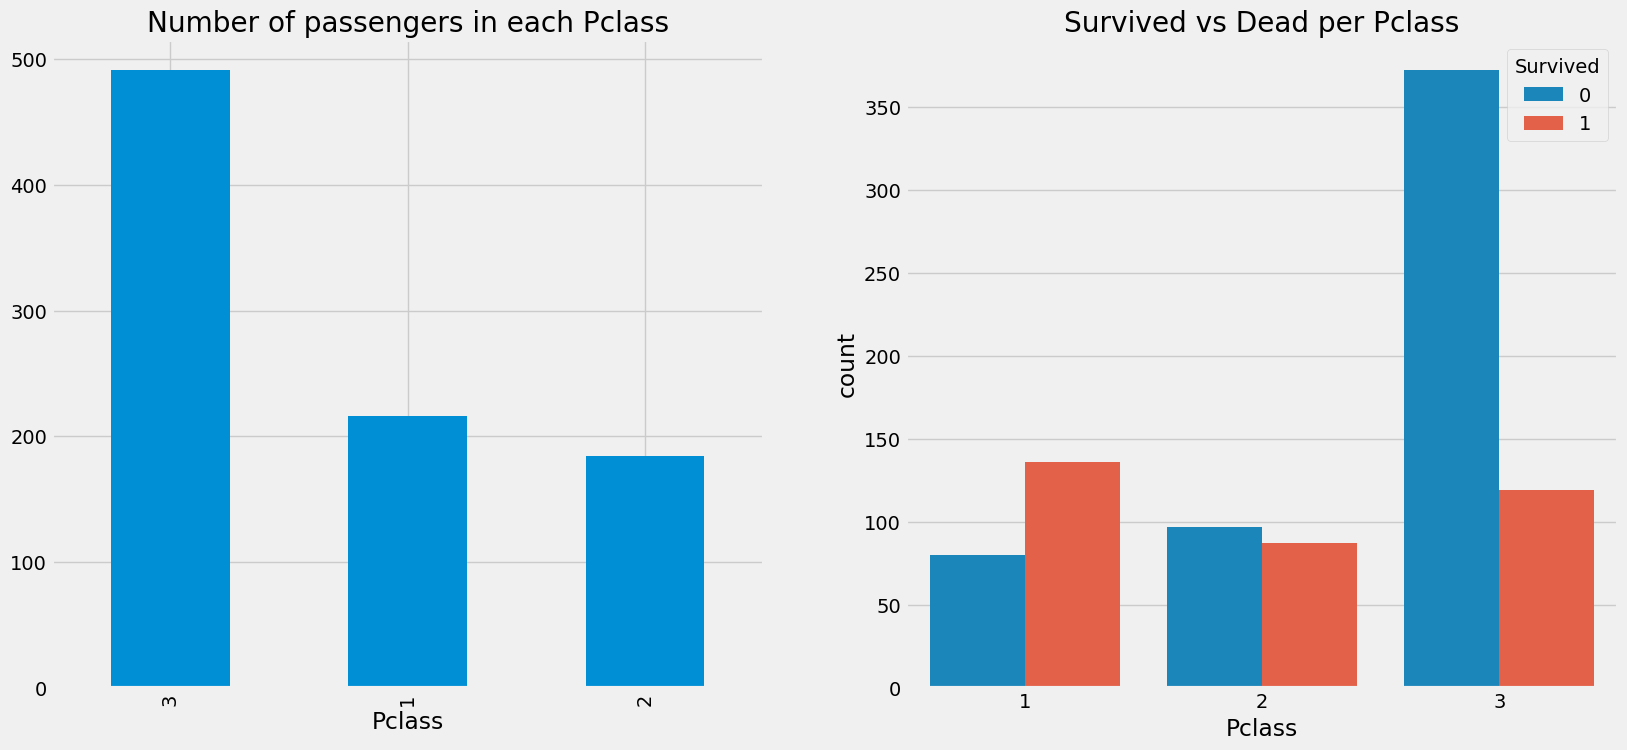

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
df['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of passengers in each Pclass')

sns.countplot(x='Pclass', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Survived vs Dead per Pclass')

It can be observed that passengers in first class have a higher survival rate even if the number of passengers were the most in third class

## Survival rate wrt Pclass and Sex

In [71]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

## Relation of Survival, Pclass and Sex with Age

In [72]:
print(f"Oldest passenger: ", df['Age'].max())
print(f"Youngest passenger: ", df['Age'].min())
print(f"Average age of passengers: ", df['Age'].mean())

Oldest passenger:  80.0
Youngest passenger:  0.42
Average age of passengers:  29.69911764705882


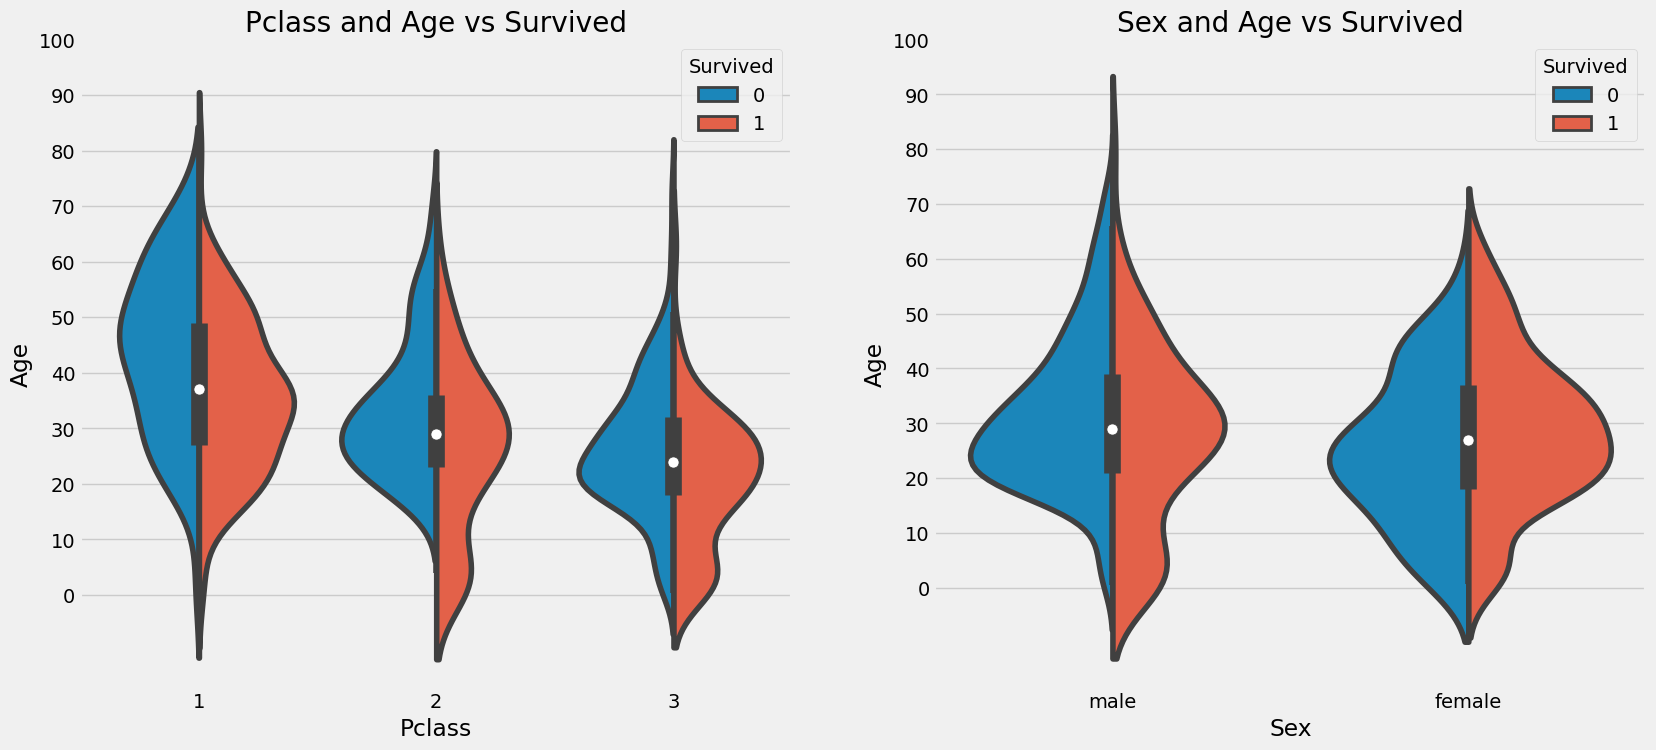

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot(df, x="Pclass", y="Age", hue="Survived", split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(df, x="Sex", y="Age", hue="Survived", split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

Survival rate is higher for passengers below age 10 irrespective of the class. Survival rate for mid-aged passengers, especially women from the first class is high. 

In [74]:
df['In']=0
for i in df:
    df['In'] = df.Name.str.extract('([A-Za-z]+)\.')

Extracting the initials to estimate the age for nan values

In [75]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,In
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [76]:
pd.crosstab(df.In, df.Sex)

Sex,female,male
In,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [77]:
df['In'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir','Don'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

/tmp/ipykernel_33/918943050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['In'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir','Don'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)


In [78]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,In
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [79]:
df.groupby('In')['Age'].mean()

In
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [80]:
df.Age.isnull().any()

True

In [81]:
df.loc[(df.Age.isnull()) & (df.In=='Mr'), 'Age'] = 33
df.loc[(df.Age.isnull()) & (df.In=='Mrs'), 'Age'] = 36
df.loc[(df.Age.isnull()) & (df.In=='Master'), 'Age'] = 5
df.loc[(df.Age.isnull()) & (df.In=='Miss'), 'Age'] = 22
df.loc[(df.Age.isnull()) & (df.In=='Other'), 'Age'] = 46

In [82]:
df.Age.isnull().any()

False

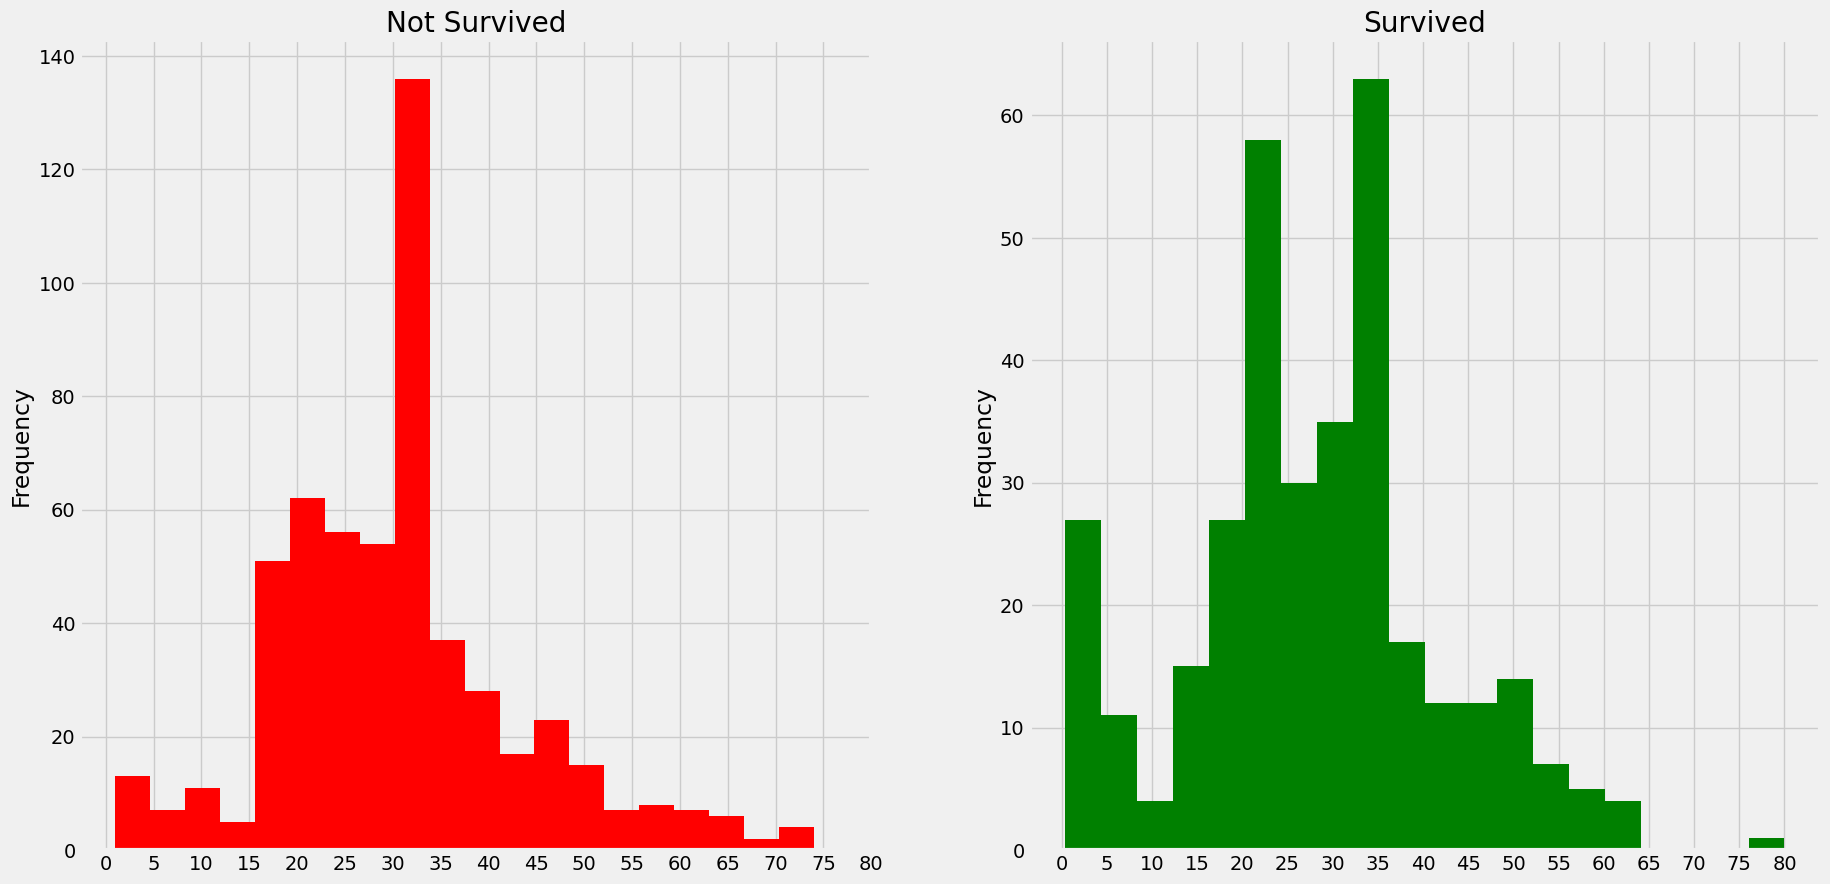

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

df[df['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, color='red')
ax[0].set_title('Not Survived')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

df[df['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, color='green')
ax[1].set_title('Survived')
x2 = list(range(0, 85,5))
ax[1].set_xticks(x2)

plt.show()

It can be observed that children below the age of 5 have higher survival rates. Similarly, the oldest passenger was also saved. Maximum number of deaths were in the age group of 30-40

## Survival rate wrt Embarked status

In [84]:
pd.crosstab([df.Embarked, df.Pclass], [df.Sex, df.Survived], margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

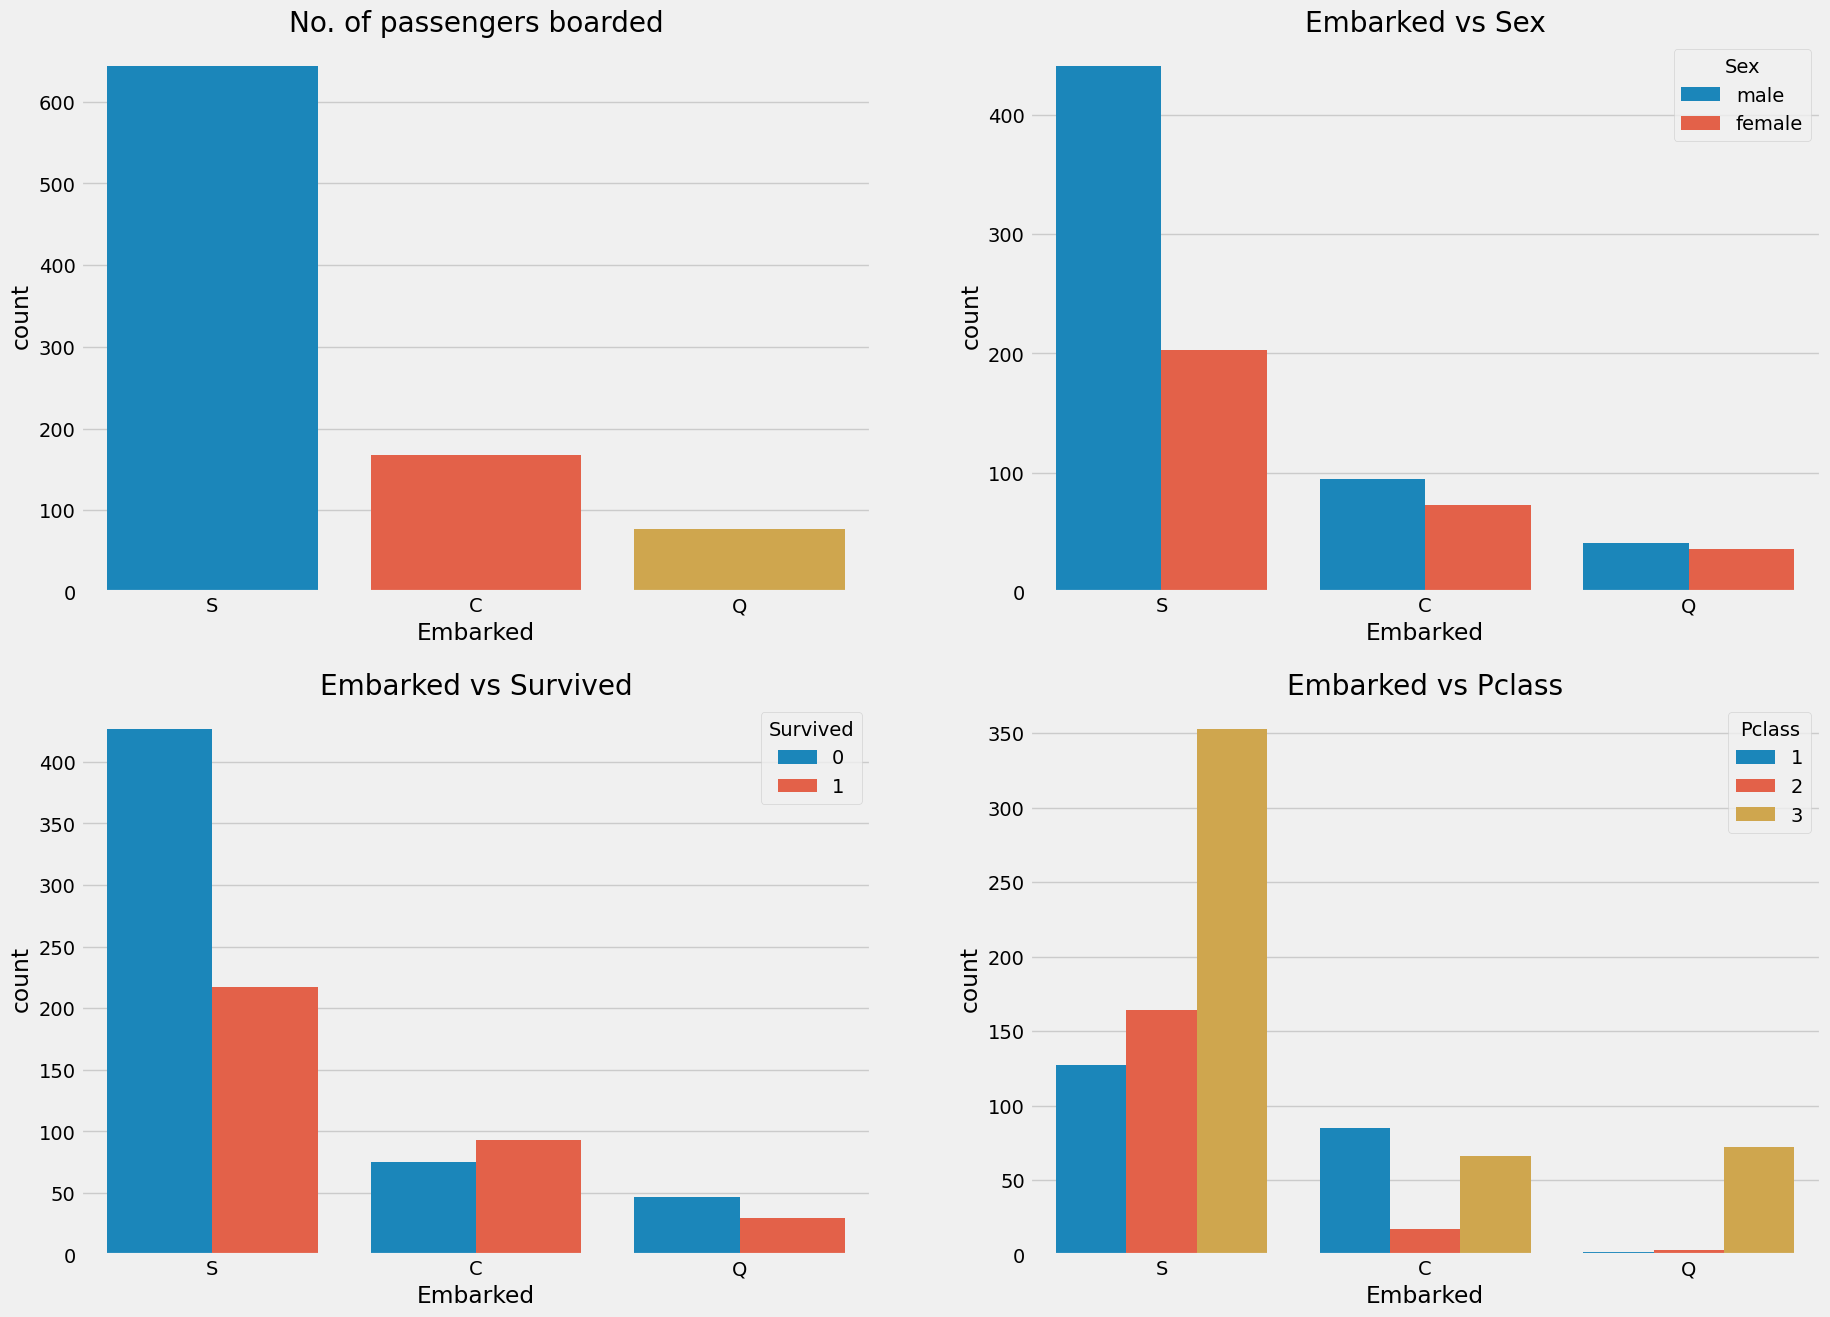

In [85]:
fig,ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot(x='Embarked', data=df, ax=ax[0,0])
ax[0,0].set_title('No. of passengers boarded')

sns.countplot(x='Embarked', hue='Sex', data=df, ax=ax[0,1])
ax[0,1].set_title('Embarked vs Sex')

sns.countplot(x='Embarked', hue='Survived', data=df, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.show()

Maximum passengers emabrked from port S. Most of them belong to the 3rd class. The survival rate is least here.
Passengers from Port C have a good survival rate. It may be because most are from Pclass 1. 
Most of the people who boarded at port Q belong to the 3rd class.

In [86]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,In
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


## Survival rate wrt SibSp

In [87]:
pd.crosstab([df.SibSp], df.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Text(0.5, 1.0, 'SibSp vs Survived')

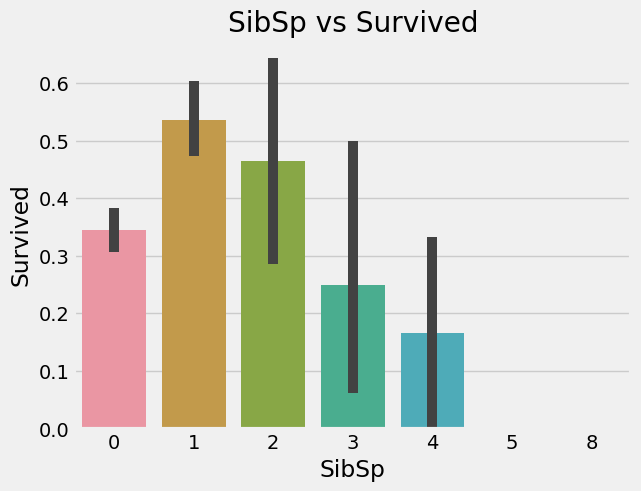

In [88]:
sns.barplot(x='SibSp', y='Survived', data=df).set_title('SibSp vs Survived')


In [89]:
pd.crosstab(df.SibSp, df.Pclass)

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Passengers who were travelling alone have a 34.5% survival rate. More the number of siblings, lesser the chance to survive. People with SibSp>5 are from Pclass 3 and therefore have a 0% survival rate. Therefore, all large families (>3) from Pclass 3 died.

## Survival rate wrt Parch

In [90]:
pd.crosstab(df.Parch, df.Pclass)

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Text(0.5, 1.0, 'Parch vs Survived')

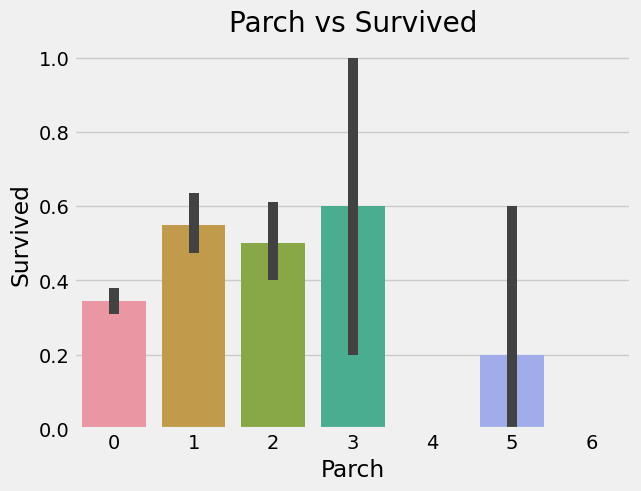

In [91]:
sns.barplot(x='Parch', y='Survived', data=df).set_title('Parch vs Survived')

Passengers with parents onboard have more chance of survival. But as numbers go up, their chance reduces. 

## Relation between Fare and PClass

In [92]:
print('Highest fare: ', df['Fare'].max())
print('Least fare: ', df['Fare'].min())
print('Average fare: ', df['Fare'].mean())

Highest fare:  512.3292
Least fare:  0.0
Average fare:  32.204207968574636


/tmp/ipykernel_33/736449077.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Pclass']==1].Fare, ax=ax[0]).set_title('Fares in Pclass 1')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/736449077.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` 

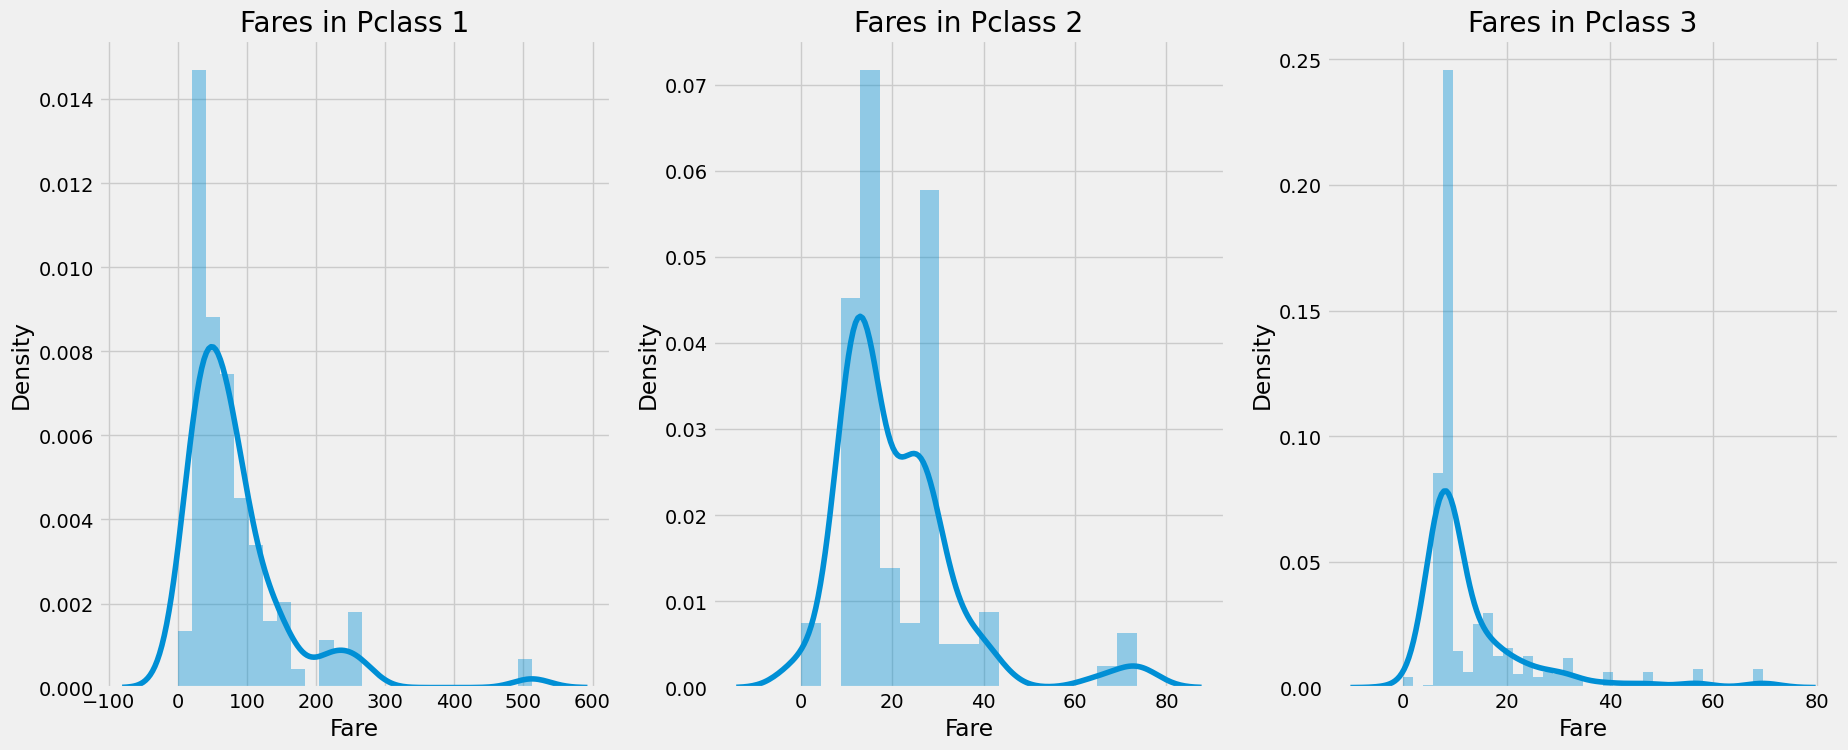

In [93]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(df[df['Pclass']==1].Fare, ax=ax[0]).set_title('Fares in Pclass 1')
sns.distplot(df[df['Pclass']==2].Fare, ax=ax[1]).set_title('Fares in Pclass 2')
sns.distplot(df[df['Pclass']==3].Fare, ax=ax[2]).set_title('Fares in Pclass 3')
plt.show()

In [94]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,In
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


## Correlation between the features

In [95]:
df['AgeBand']=0
df.loc[df['Age']<=16, 'AgeBand'] = 0
df.loc[(df['Age']>16)&(df['Age']<=32),'AgeBand']=1
df.loc[(df['Age']>32)&(df['Age']<=48),'AgeBand']=2
df.loc[(df['Age']>48)&(df['Age']<=64),'AgeBand']=3
df.loc[df['Age']>64,'AgeBand']=4
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,In,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [97]:
df['AgeBand'].value_counts().to_frame()

,count
AgeBand,
1,382
2,325
0,104
3,69
4,11


In [98]:
df['FamilySize'] = 0
df['FamilySize']=df['Parch']+df['SibSp']
df['Alone'] = 0
df.loc[df.FamilySize==0, 'Alone'] = 1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,In,AgeBand,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,0,1


In [99]:
df['FareRange'] = pd.qcut(df.Fare, 4)
df.groupby(['FareRange'])['Survived'].mean().to_frame()

/tmp/ipykernel_33/3716239144.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['FareRange'])['Survived'].mean().to_frame()


,Survived
FareRange,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [100]:
df['FareCat'] = 0
df.loc[df['Fare']<=7.91, 'FareCat'] = 0
df.loc[(df['Fare']>7.91)&(df['Fare']<=14.454),'FareCat']=1
df.loc[(df['Fare']>14.454)&(df['Fare']<=31),'FareCat']=2
df.loc[(df['Fare']>31)&(df['Fare']<=513),'FareCat']=3
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,In,AgeBand,FamilySize,Alone,FareRange,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other,1,0,1,"(7.91, 14.454]",1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,0,1,"(14.454, 31.0]",2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,3,0,"(14.454, 31.0]",2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,0,1,"(14.454, 31.0]",2


In [101]:
df.Embarked.fillna('S', inplace=True)

/tmp/ipykernel_33/4256457318.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Embarked.fillna('S', inplace=True)


In [102]:
df.Embarked.isnull().any()

False

In [103]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df['In'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

/tmp/ipykernel_33/3420415749.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace(['male','female'],[0,1],inplace=True)
/tmp/ipykernel_33/3420415749.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'].replace(['male','female'],[0,1],inplace=True)
/tmp/ipykernel_33/34204157

In [104]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,In,AgeBand,FamilySize,Alone,FareRange,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,4,1,0,1,"(7.91, 14.454]",1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,2,1,0,1,"(14.454, 31.0]",2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,22.0,1,2,W./C. 6607,23.4500,NaN,0,2,1,3,0,"(14.454, 31.0]",2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1,0,1,0,1,"(14.454, 31.0]",2


In [105]:
df.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'FareRange', 'PassengerId'], axis=1, inplace=True)

In [106]:
df

,Survived,Pclass,Sex,SibSp,Parch,Embarked,In,AgeBand,FamilySize,Alone,FareCat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,0,4,1,0,1,1
887,1,1,1,0,0,0,2,1,0,1,2
888,0,3,1,1,2,0,2,1,3,0,2
889,1,1,0,0,0,1,0,1,0,1,2


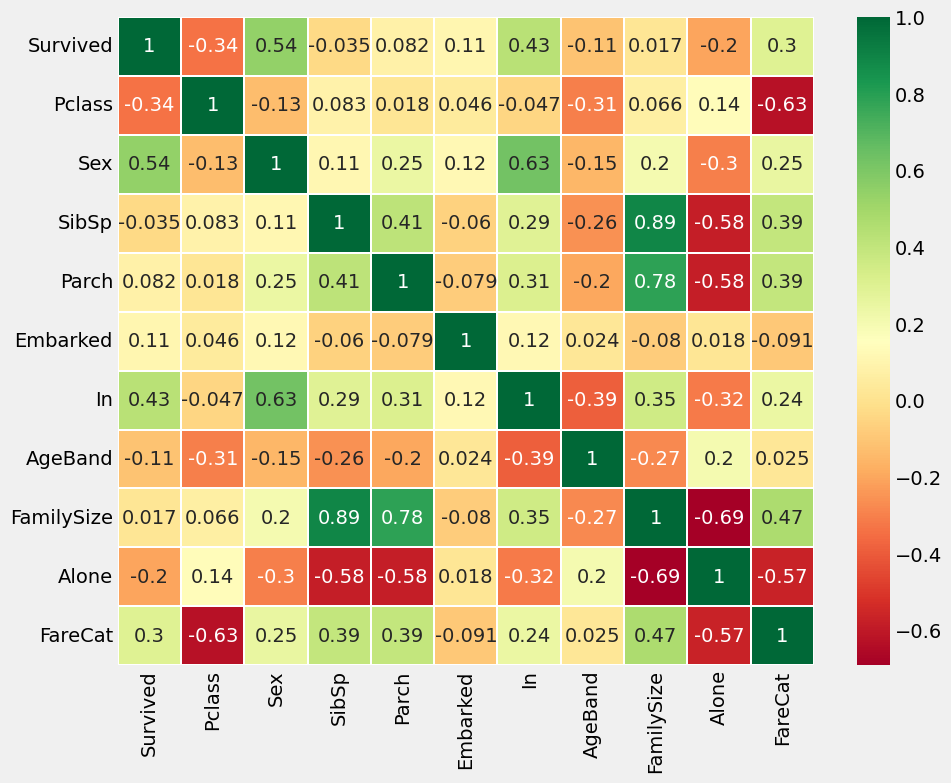

In [107]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()